## 필수과제2
- crime.csv 데이터 시계열 분석 진행하기
- 해당 범죄와 교통사고건에 대해서 시계열적으로 나눠서 그래프를 그리면서 본인 생각하는 인사이트를 정리해서 뽑아주세요!
- 예를 들어 주말에 범죄가 가장 높더라, 어떤 지역 또는 어떤 범죄 유형이 많이 발생하더라 등등
- 배웠던 시각화 문법을 가지고 함께 수치와 시각화를 통해서 정리 부탁드립니다!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crime.csv')

In [3]:
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [17]:
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
 9   REPORTED_YEAR        460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 35.2+ MB


In [21]:
df = df.set_index('REPORTED_DATE')
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,REPORTED_YEAR
REPORTED_DATE,,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,2014
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,2014
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,2014
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,2014
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,2014
...,...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,2017
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,2017
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,2017


### 범죄가 가장 많이 발생한 연도

In [29]:
crime_counts = df['IS_CRIME']

In [30]:
crime_counts

REPORTED_DATE
2014-06-29 02:01:00    0
2014-06-29 01:54:00    1
2014-06-29 02:00:00    1
2014-06-29 02:18:00    1
2014-06-29 04:17:00    1
                      ..
2017-09-13 05:48:00    1
2017-09-12 20:37:00    1
2017-09-12 16:32:00    1
2017-09-12 13:04:00    1
2017-09-12 09:30:00    1
Name: IS_CRIME, Length: 460911, dtype: int64

C:\Users\jh060\AppData\Local\Temp\ipykernel_2968\1268639713.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_counts = df.resample('Y').sum()[['IS_CRIME', 'IS_TRAFFIC']]


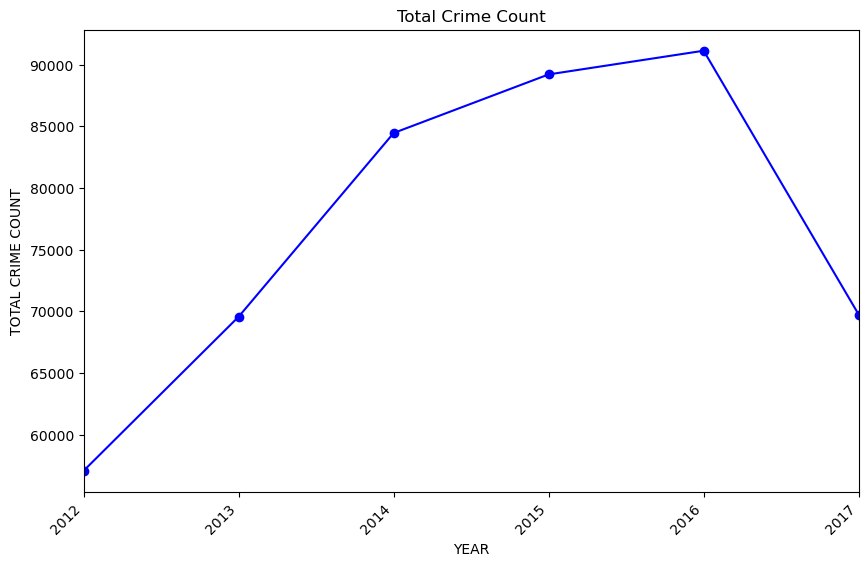

In [34]:
crime_counts = df.resample('Y').sum()[['IS_CRIME', 'IS_TRAFFIC']]
crime_counts['CRIME'] = crime_counts['IS_CRIME'] + crime_counts['IS_TRAFFIC']

# 선 그래프 그리기
ax = crime_counts['CRIME'].plot.line(marker='o', linestyle='-', color='b', figsize=(10, 6))

# x축 레이블과 y축 레이블 설정
years = crime_counts.index.year
ax.set_xticks(crime_counts.index)
ax.set_xticklabels(years, rotation=45, ha='right')
ax.set_xlabel('YEAR')
ax.set_ylabel('TOTAL CRIME COUNT')

# 그래프 제목 설정
ax.set_title('Total Crime Count')

plt.show()

- 2016년에 가장 많은 범죄가 발생함

### 시간대별 범죄율

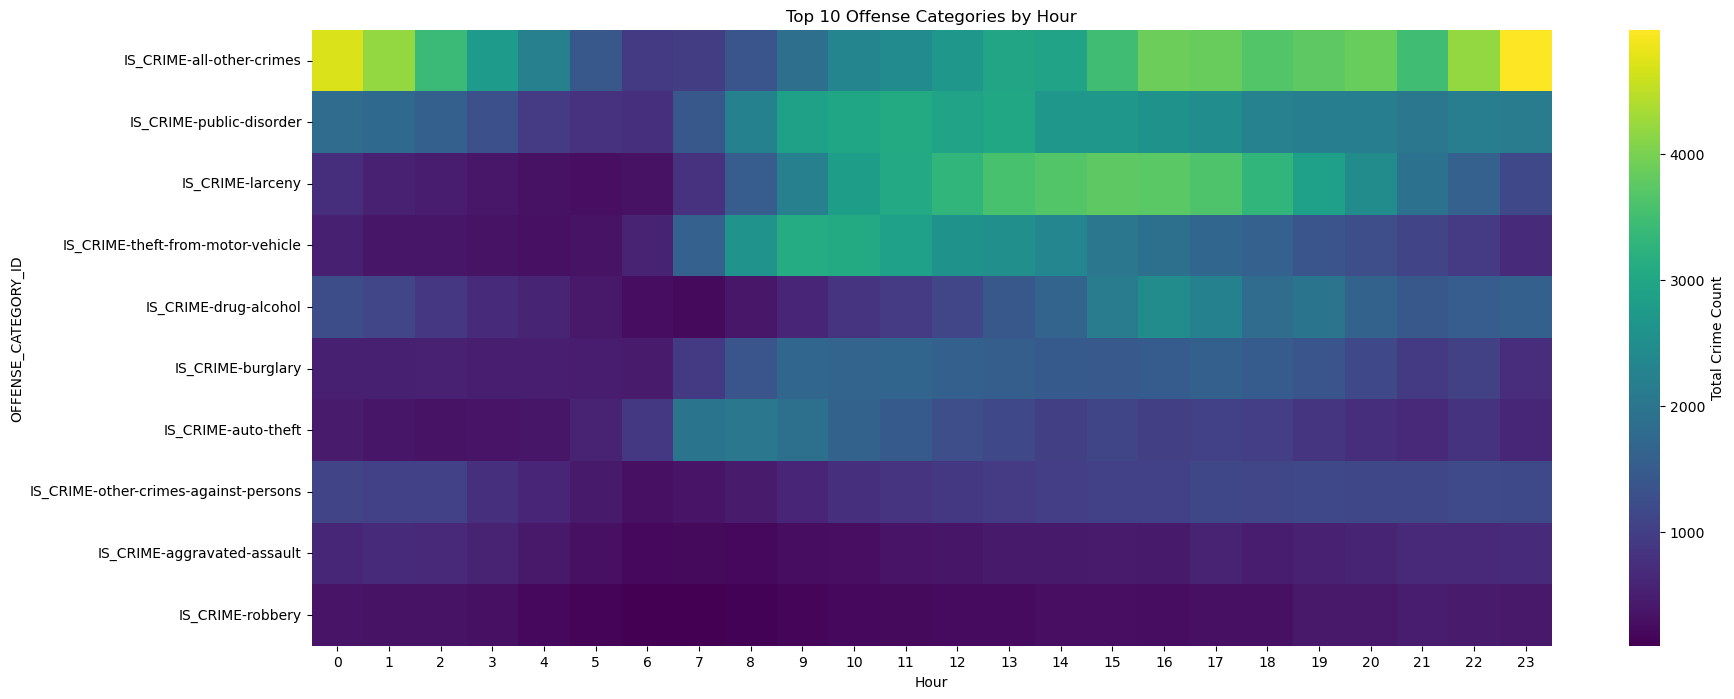

In [60]:
plt.figure(figsize=(20, 8))

us_subset = us[top_cate]

sns.heatmap(us_subset.T, cmap='viridis', cbar_kws={'label': 'Total Crime Count'})

plt.xlabel('Hour')
plt.ylabel('OFFENSE_CATEGORY_ID')
plt.title('Top 10 Offense Categories by Hour')

plt.show()

- 23~00시 사이 가장 많은 범죄가 발생함

### 요일,시간별 범죄율

In [39]:
df['day'] = df.index.day_name()
df['hour'] = df.index.hour

In [40]:
df.pivot_table(index='day',columns='hour',values='IS_CRIME',aggfunc='sum')

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,1882,1549,1360,1058,815,695,681,1310,1902,2321,...,2686,2764,2842,2694,2498,2513,2353,2021,2246,2235
Monday,1623,1551,1307,1084,930,760,757,1590,2337,2804,...,2983,3110,3023,2995,2631,2541,2189,1956,2000,1897
Saturday,2056,1957,1858,1566,1271,951,704,943,1337,1641,...,1941,2042,2160,2317,2191,2134,2093,1951,2235,2323
Sunday,2119,2040,2017,1734,1418,1026,752,867,1123,1510,...,1923,1996,2146,2191,1976,2020,2005,1918,2005,1916
Thursday,1650,1401,1151,906,752,620,653,1324,1955,2455,...,2783,2949,3050,2945,2685,2568,2443,2102,2286,2102
Tuesday,1505,1328,1049,918,745,656,669,1367,2085,2588,...,2973,3069,3046,2915,2717,2522,2227,2131,1974,1872
Wednesday,1452,1261,996,868,668,552,682,1385,1965,2466,...,2927,3229,3170,3028,2800,2628,2444,2060,2089,2020


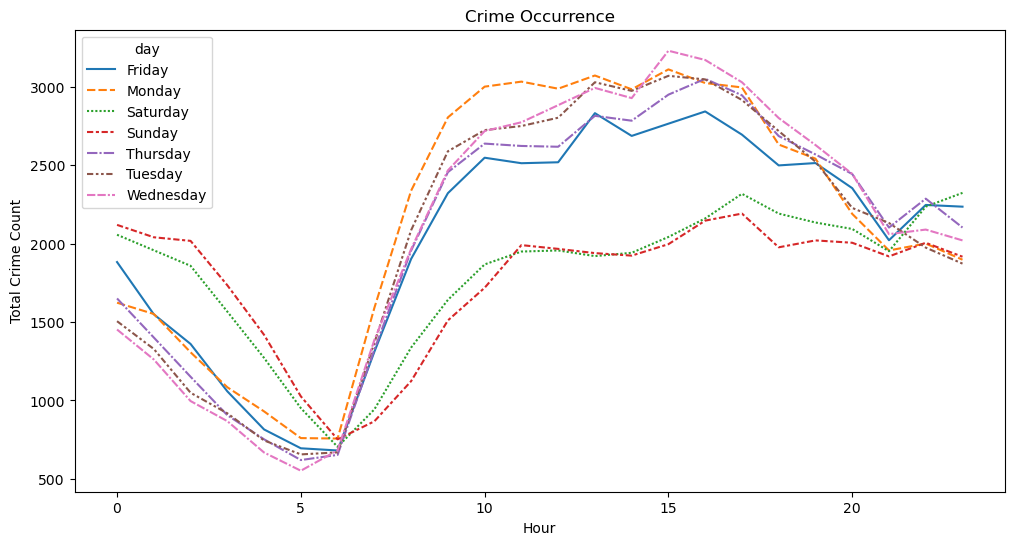

In [45]:
crime_by_day_hour = df.pivot_table(index='day', columns='hour', values='IS_CRIME', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_by_day_hour.T)  # T는 transpose를 의미하며, 요일이 x축에 오도록 전치합니다.

plt.title('Crime Occurrence')
plt.xlabel('Hour')
plt.ylabel('Total Crime Count')

plt.show()

- 평균적으로 3~4시쯤 가장 많은 범죄가 발생하는 것을 확인 가능

### 범죄 유형

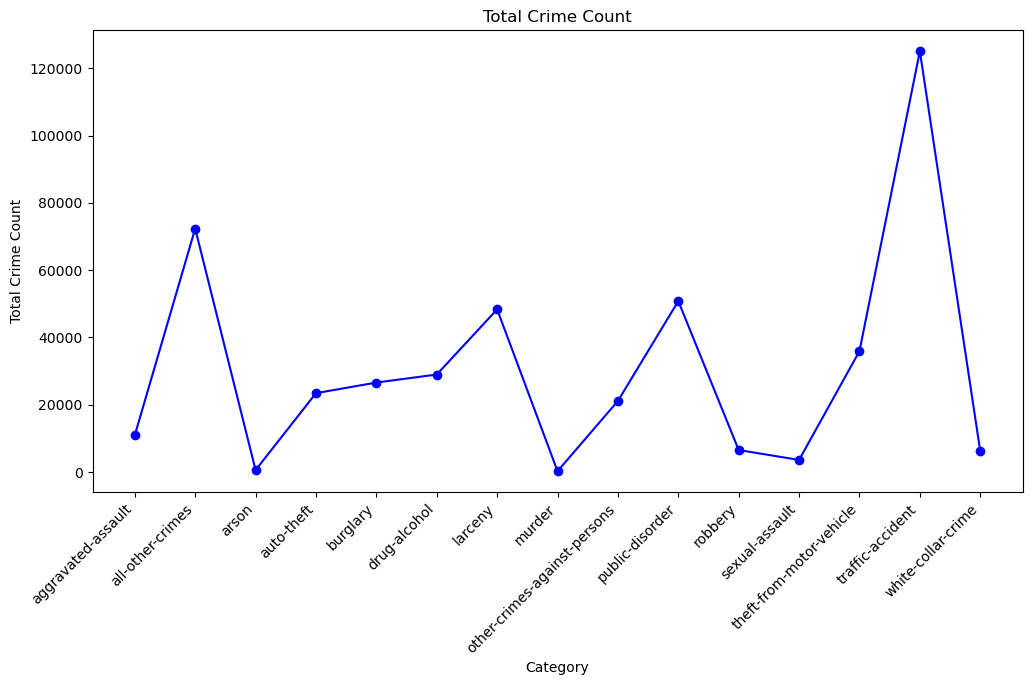

In [37]:
crime_category_counts = df['OFFENSE_CATEGORY_ID'].value_counts()

ax = crime_category_counts.sort_index().plot.line(marker='o', linestyle='-', color='b', figsize=(12, 6))

ax.set_xticks(range(len(crime_category_counts)))
ax.set_xticklabels(crime_category_counts.sort_index().index, rotation=45, ha='right')
ax.set_xlabel('Category')
ax.set_ylabel('Total Crime Count')

ax.set_title('Total Crime Count')

plt.show()

- traffic-accident로 발생한 범죄가 가장 많음

In [62]:
# 데이터 확인
df['OFFENSE_TYPE_ID'].value_counts()

traffic-accident                87420
traffic-accident-hit-and-run    33514
theft-items-from-vehicle        27468
traf-other                      25793
theft-of-motor-vehicle          23004
                                ...  
homicide-negligent                  1
riot                                1
theft-from-yards                    1
theft-of-cable-services             1
explosives-posses                   1
Name: OFFENSE_TYPE_ID, Length: 196, dtype: int64